# Model of a 1-D ball-spring system in a gravitational field.

In this project, we attempt to model the happy/sad balls that are often used in physics demonstrations.

When dropped, the 'happy' ball bounces back almost to where it started. But the 'sad' ball, dropped from the same height, thuds onto the table and does not bounce at all. 

A fantastic demonstration can be seen below:

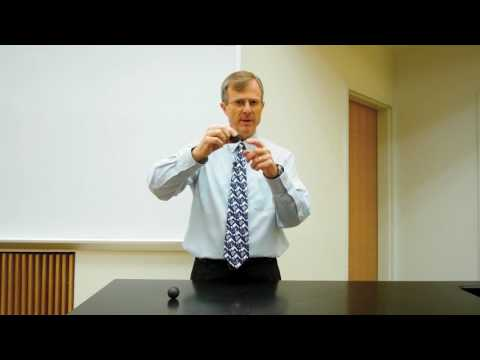

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo('lubaukB6B34')

Despite these balls looking nearly identical from the outside, on the inside they have very different structures. 

Here we model this internal structure as a ball-spring model of a solid in 1 dimension. The difference between the two balls is a different spring constant.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [10]:
def RK4(diffeq, y0, t, h):
    k1 = h*diffeq(y0, t)                    # dy/dt at t
    k2 = h*diffeq(y0+0.5*k1, t + h/2.)      # dy/dt at t+h/2
    k3 = h*diffeq(y0+0.5*k2, t + h/2.)      # dy/dt at t+h/2
    k4 = h*diffeq(y0+k3, t + h)             # dy/dt at t+h
    return y0 + (k1+k4)/6.0 + (k2+k3)/3.0

We have based this differential equations from Dr. Aaron Titus' fantastic jupyter notebook on coupled oscillators, as well as a lunch spent working on this model. 

The equations motion for the displacement $u_i$ of each mass $m_i$ is

$$m_1\ddot{u}_1 = -k(u_1-u_2)$$

$$m_2\ddot{u}_2 = -k(u_2-u_1)-k(u_2-u_3)$$

$$m_3\ddot{u}_3 = -k(u_3-u_2)$$

We can then add gravity 

$$ F_{grav} = g m $$

And a damping force

$$ F_{damp} = b v $$

In [32]:
def model(y0,t):
    # y0 = [ui, udodti] where len(ui) = Natoms
    u = y0[0]
    udot = y0[1]
    
    uddot = np.zeros(Natoms)
    
    agrav = g
    b = .1
    
    for i in range(Natoms-1):
        if i == 0:
            uddot[i] = -k/m*(u[i]-u[i+1])
            
        elif i == Natoms:
            uddot[i] = -k/m*(u[i]-u[i-1])
            
        else:
            uddot[i] = -k/m*(u[i]-u[i-1])-k/m*(u[i]-u[i+1])
            
        uddot[i] = uddot[i] + agrav - b*udot[i]
    
    return np.asarray([udot,uddot])

In this model, we have set the spring constant to 1. The units here are natural units, so we will just change the spring constant by factors of ten and look at the results qualitatively. 

100%|██████████| 10000/10000 [00:00<00:00, 11887.65it/s]


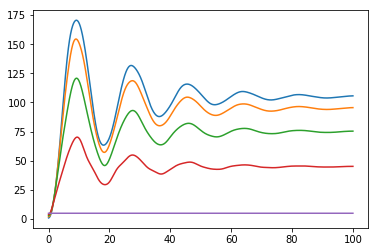

In [33]:
Natoms = 5
g = 10
k = 1
m = 1
L0 = 1
h = 0.01
t_total = 100

# set up initial conditions
ui = np.linspace(L0,Natoms*L0, Natoms)
udoti = np.zeros(Natoms)

# set up arrays to store data
tarr = np.arange(0,t_total,h)
uarr = []
varr = []


y0 = np.asarray([ui,udoti])

for t in tqdm(tarr):
    
    y1 = RK4(model, y0, t, h) 

    y0 = np.copy(y1)

    uarr.append(y0[0])
    varr.append(y0[1])


plt.plot(tarr,uarr)

Now let's examiine what happens when we increase the spring constant ten times:

100%|██████████| 10000/10000 [00:00<00:00, 11561.45it/s]


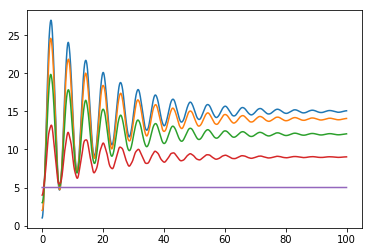

In [35]:
Natoms = 5
g = 10
k = 10
m = 1
L0 = 1
h = 0.01
t_total = 100

# set up initial conditions
ui = np.linspace(L0,Natoms*L0, Natoms)
udoti = np.zeros(Natoms)

# set up arrays to store data
tarr = np.arange(0,t_total,h)
uarr = []
varr = []


y0 = np.asarray([ui,udoti])

for t in tqdm(tarr):
    
    y1 = RK4(model, y0, t, h) 

    y0 = np.copy(y1)

    uarr.append(y0[0])
    varr.append(y0[1])


plt.plot(tarr,uarr)

It looks as though the ball bounces much more when the spring constant is higher. The higher spring constant allows the entire ball to act more like one single particle, enabling the collision to be more elastic.

